# Solución usando librería

Importamos las librerías necesarias

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing()

## Función para mejorar la presentación de los arreglos de numpy (matrices)
pp = sp.Matrix

La librería `elemento` puede ser importada de igual manera, estando el archivo en este directorio

In [2]:
import elemento1D as el

Declaramos el primer elemento:

In [3]:
e1 = el.Elemento1D(1, 'TC', x=[0.0,0.05], nodos_globales=[1,2], numero_nodos=3, K=[40,50], h1=100, Tinf1=400)
e1.out_model()

⎛⎡K       -K ⎤            ⎞
⎜⎢─ + h₁  ───⎥            ⎟
⎜⎢h        h ⎥  ⎡Tinf₁⋅h₁⎤⎟
⎜⎢           ⎥, ⎢        ⎥⎟
⎜⎢ -K      K ⎥  ⎣   0    ⎦⎟
⎜⎢ ───     ─ ⎥            ⎟
⎝⎣  h      h ⎦            ⎠

Declaramos el segundo elemento:

In [4]:
e2 = el.Elemento1D(1, 'TC', x=[0.05,0.1], nodos_globales=[2,3], numero_nodos=3, K=[50,60])
e2.out_model()

⎛⎡ K   -K ⎤     ⎞
⎜⎢ ─   ───⎥     ⎟
⎜⎢ h    h ⎥  ⎡0⎤⎟
⎜⎢        ⎥, ⎢ ⎥⎟
⎜⎢-K    K ⎥  ⎣0⎦⎟
⎜⎢───   ─ ⎥     ⎟
⎝⎣ h    h ⎦     ⎠

Para verificar, podemos graficar los elementos.

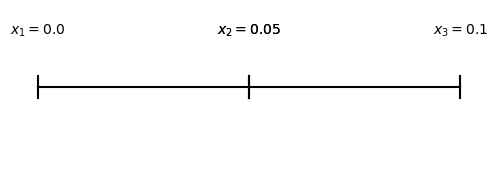

In [5]:
plt.figure(figsize=(6,2))
e1.Grafica()
e2.Grafica()
plt.gca().axis('off')
plt.gca().axis('equal')
plt.show()

Ensamblamos las matrices usando `extend=True`

In [6]:
M = e1.out_matrix(extend=True) + e2.out_matrix(extend=True)
pp(M)

⎡1000.0  -900.0      0   ⎤
⎢                        ⎥
⎢-900.0  2000.0   -1100.0⎥
⎢                        ⎥
⎣  0     -1100.0  1100.0 ⎦

El vector fuerza:

In [7]:
print(e1.out_force())
F = e1.out_force(extend=True) + e2.out_force(extend=True)
pp(F)

Matrix([[40000.0000000000], [0]])


⎡40000.0⎤
⎢       ⎥
⎢   0   ⎥
⎢       ⎥
⎣   0   ⎦

Aplicamos las condiciones de frontera de Dirichlet (temperatura conocida) substituyendo la línea
correspondiente al valor conocido con el correspondiente vector de la matriz unitiaria colocado
en el renglón de la incógnita conocida.

In [8]:
# Diriclhet
Md = M.copy()
Fd = F.copy()

Md[2] = np.array([0,0,1])
Fd[2] = 39.18

pp(Md)

⎡1000.0  -900.0     0   ⎤
⎢                       ⎥
⎢-900.0  2000.0  -1100.0⎥
⎢                       ⎥
⎣  0       0       1.0  ⎦

In [9]:
pp(Fd)

⎡40000.0⎤
⎢       ⎥
⎢   0   ⎥
⎢       ⎥
⎣ 39.18 ⎦

Resolvemos usando `numpy`:

In [10]:
T = np.linalg.solve(Md, Fd)
pp(T)

⎡99.8220168067227⎤
⎢                ⎥
⎢66.4689075630252⎥
⎢                ⎥
⎣     39.18      ⎦

Para conocer el flujo de calor en el extremo derecho, podemos multiplicar nuestra solución
por las temperaturas obtenidas.

In [11]:
pp(M@T)

⎡      40000.0       ⎤
⎢                    ⎥
⎢2.21405116462847e-11⎥
⎢                    ⎥
⎣ -30017.7983193277  ⎦